In [66]:
import pandas as pd

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, \
                                  MinMaxScaler
from sklearn.svm import SVR
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from mglearn.datasets import make_wave

import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame(data={
    'age': [39, 50, 38, 53, 28, 37],
    'workclass': [
        'Stage-gov', 'Self-emp-not-inc',
        'Private', 'Private', 'Private',
        'Private'
    ],
    'education': [
        'Bachelors', 'Bachelors',
        'HS-grad', '11th', 'Bachelors',
        'Some-college'
    ],
    'gender': [
        'Male', 'Male', 'Male', 'Male',
        'Female', 'Male'
    ],
    'hours_per_week': [40, 13, 40, 40, 40, 80],
    'occupation': [
        'Adm-clerical', 'Exec-managerial',
        'Handlers-cleaners', 'Handlers-cleaners',
        'Prof-speciaty', 'Exec-managerial'
    ],
    'income': [
        '<=50', '<=50', '<=50', '<=50',
        '<=50', '>50'
    ]
    
})

df

,age,workclass,education,gender,hours_per_week,occupation,income
0,39,Stage-gov,Bachelors,Male,40,Adm-clerical,<=50
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50
3,53,Private,11th,Male,40,Handlers-cleaners,<=50
4,28,Private,Bachelors,Female,40,Prof-speciaty,<=50
5,37,Private,Some-college,Male,80,Exec-managerial,>50


In [5]:
dummyied_df = pd.get_dummies(df)

dummyied_df

,age,hours_per_week,workclass_Private,workclass_Self-emp-not-inc,workclass_Stage-gov,education_11th,education_Bachelors,education_HS-grad,education_Some-college,gender_Female,gender_Male,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Handlers-cleaners,occupation_Prof-speciaty,income_<=50,income_>50
0,39,40,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0
1,50,13,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,38,40,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
3,53,40,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,28,40,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
5,37,80,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1


In [7]:
df.gender.value_counts()

Male      5
Female    1
Name: gender, dtype: int64

In [9]:
X, y = \
    dummyied_df.drop(labels=['income_<=50', 'income_>50'], axis=1), \
    dummyied_df['income_<=50']

## LogisticRegression

In [10]:
lr = LogisticRegression()
lr.fit(X, y)

lr.score(X, y)

1.0

## Test

In [11]:
demo_df = pd.DataFrame(data={
    'number': [0, 1, 2, 1],
    'string': ['socks', 'fox', 'socks', 'box']
})

demo_df

,number,string
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [13]:
dummyied_df = pd.get_dummies(demo_df)

dummyied_df

,number,string_box,string_fox,string_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


## Binning

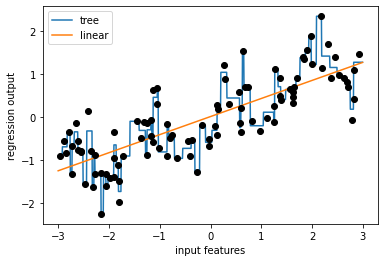

In [25]:
X, y = make_wave(n_samples=100)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3)
reg.fit(X, y)

plt.plot(line, reg.predict(line), label='tree')

reg = LinearRegression()
reg.fit(X, y)

plt.plot(line, reg.predict(line), label='linear')

plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel('regression output')
plt.xlabel('input features')

plt.legend(loc='best')

## Encoding

In [30]:
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)

X_binned[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Text(0.5, 0, 'input feature')

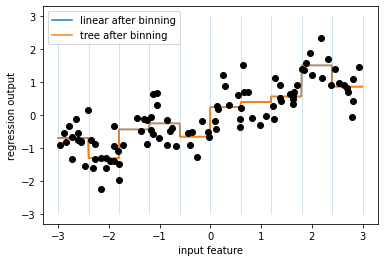

In [32]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)

plt.plot(line, reg.predict(line_binned), label='linear after binning')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

plt.plot(line, reg.predict(line_binned), label='tree after binning')
plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.legend(loc='best')

plt.ylabel('regression output')
plt.xlabel('input feature')

## Polinoms

In [35]:
X_combined = np.hstack([X, X_binned])

X_combined.shape

(100, 11)

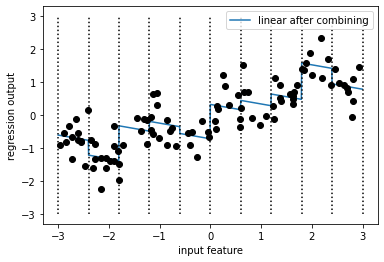

In [36]:
reg = LinearRegression()
reg.fit(X_combined, y)

line_combined = np.hstack([line, line_binned])

plt.plot(line, reg.predict(line_combined), label='linear after combining')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc='best')

plt.ylabel('regression output')
plt.xlabel('input feature')

plt.plot(X[:, 0], y, 'o', c='k')

In [37]:
X_product = np.hstack([X_binned, X * X_binned])

X_product.shape

(100, 20)

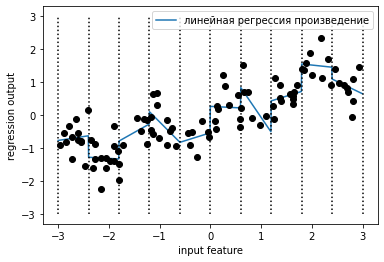

In [38]:
reg = LinearRegression()
reg.fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='линейная регрессия произведение')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel('regression output')
plt.xlabel('input feature')

plt.legend(loc='best')

In [41]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)
X_poly[:10]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

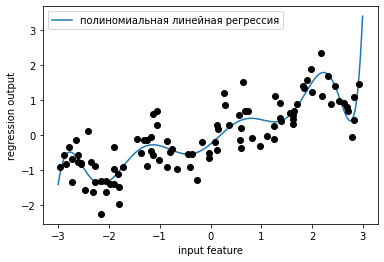

In [42]:
reg = LinearRegression()
reg.fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel('regression output')
plt.xlabel('input feature')

plt.legend(loc='best')

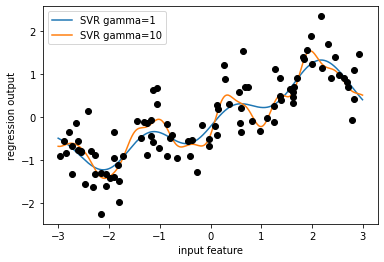

In [47]:
for gamma in [1, 10]:
    svr = SVR(gamma=gamma)
    svr.fit(X, y)

    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')

plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel('regression output')
plt.xlabel('input feature')

plt.legend(loc='best')

In [50]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target,
    random_state=0
)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [53]:
X_train_poly.shape

(379, 105)

In [54]:
X_test_poly.shape

(127, 105)

## Linear

In [57]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Text(0.5, 0, 'value')

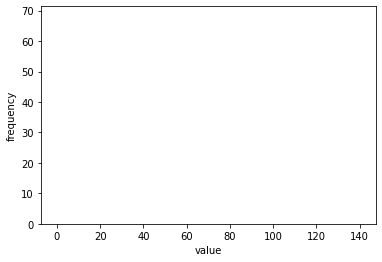

In [58]:
bins = np.bincount(X[:, 0])

plt.bar(range(len(bins)), bins, color='w')

plt.ylabel('frequency')
plt.xlabel('value')

In [60]:
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target,
    random_state=0, test_size=.5
)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

In [61]:
X_train.shape

(284, 80)

In [62]:
X_train_selected.shape

(284, 40)

In [63]:
select.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True,  True, False,  True, False, False, False, False])

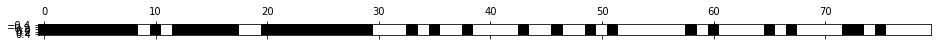

In [64]:
plt.matshow(select.get_support().reshape(1, -1), cmap='gray_r')

In [67]:
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)

In [68]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

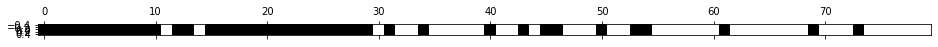

In [69]:
plt.matshow(select.get_support().reshape(1, -1), cmap='gray_r')